In [ ]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [11, 17, 18, 19, 27]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor(bootstrap = 'True', n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 13.52 minutes


In [ ]:
#Making a prediction
y_pred = model.predict(X_test)

In [ ]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_test, y_pred)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_test, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_test, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')
#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse_fs).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 7.2319
The mse is: 449.3997
The rmse is: 21.1990
The R2 is: 0.8710
____________________________________________
Metrics for qc
The mae is: 0.8506 MPa
The mse is: 5.4564 MPa
The rmse is: 21.1990 MPa
The R2 is: 0.9192 MPa
____________________________________________
Metrics for fs
The mae is: 13.6133 kPa
The mse is: 893.3430 kPa
The rmse is: 29.8888 kPa
The R2 is: 0.8229 kPa


In [ ]:
'''
Saving the Model
'''
import joblib

#Saving model as joblib file
import os
joblib.dump(model, 'CPT_RF_02_88_compress.joblib', compress = 3)
print(f"Compressed Random Forest: {np.round(os.path.getsize('CPT_RF_02_88_compress.joblib') / 1024 / 1024, 2) } MB")

Compressed Random Forest: 1159.36 MB


________________________________________________________________________________
Plotting Metrics
________________________________________________________________________________

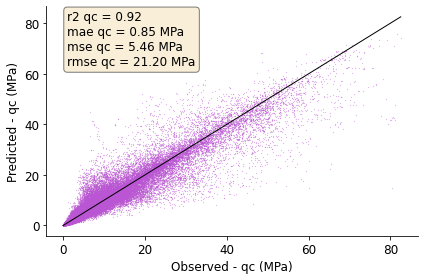

In [ ]:
'''
Plots
'''
# 'qc (MPa)' 
fig, ax = plt.subplots()

#Add the text
textstr = '\n'.join((r'r2 qc = %.2f' % (r2_qc), r'mae qc = %.2f MPa' % (mae_qc, ),r'mse qc = %.2f MPa' % (mse_qc, ), 
                     r'rmse qc = %.2f MPa' % (rmse_qc, )))

p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - qc (MPa)', fontsize = 12)
ax.set_ylabel('Predicted - qc (MPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(1, 85,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('Metrics_qc_testing.png', dpi = 600)

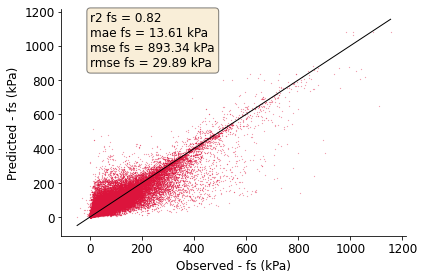

In [ ]:
# 'fs (kPa)' 
fig, ax = plt.subplots()


#Add the text
textstr = '\n'.join((r'r2 fs = %.2f' % (r2_fs), r'mae fs = %.2f kPa' % (mae_fs, ),r'mse fs = %.2f kPa' % (mse_fs, ), 
                     r'rmse fs = %.2f kPa' % (rmse_fs, )))

p1 = max(max(y_pred[:, 1]), max(y_test[:, 1]))
p2 = min(min(y_pred[:, 1]), min(y_test[:, 1]))
ax.plot([p1, p2], [p1, p2], 'k-', lw = 1)
ax.scatter(y_test[:, 1], y_pred[:, 1], s = .1, c = 'crimson', marker = '.')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel('Observed - fs (kPa)', fontsize = 12)
ax.set_ylabel('Predicted - fs (kPa)', fontsize = 12)
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)
ax.text(3, 1200,  textstr, horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = props)
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.tick_params(axis = 'both', which='major', labelsize = 12)
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('Metrics_fs_testing.png', dpi = 600)

RESIDUALS

In [ ]:
y_pred

array([[ 4.2836422 , 14.78330849],
       [ 5.35567389, 30.13451791],
       [ 2.26808742, 28.40650773],
       ...,
       [ 6.75207175, 72.30061979],
       [ 0.64178846, 23.33018514],
       [ 1.06705028, 11.38921812]])

In [ ]:
#y_test Slicing
y_test_qc = y_test[:,0]
y_test_qc

y_test_fs = y_test[:,1]
y_test_fs

array([17.8, 37.6, 31.6, ..., 71.7, 28.3,  8.1])

In [ ]:
#y_pred Slicing
#Slicing qc
y_pred_qc = y_pred[:,0]
y_pred_qc

#Slicing fs
y_pred_fs = y_pred[:,1]
y_pred_fs

array([14.78330849, 30.13451791, 28.40650773, ..., 72.30061979,
       23.33018514, 11.38921812])

In [ ]:
#Creating Residuals for qc
residuals_qc = [y_test_qc[i] - y_pred_qc[i] for i in range(len(y_pred_qc))]

#Creating Residuals for fs
residuals_fs = [y_test_fs[i] - y_pred_fs[i] for i in range(len(y_pred_fs))]

In [ ]:
#Residuals to DataFrame
residuals_qc = pd.DataFrame(residuals_qc)

residuals_fs = pd.DataFrame(residuals_fs)

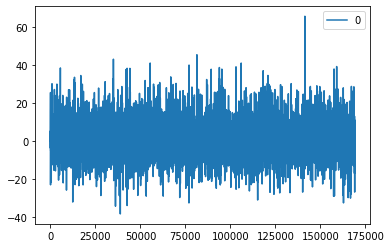

In [ ]:
#Plotting Residuals qc Distribution
residuals_qc.plot()
plt.show()

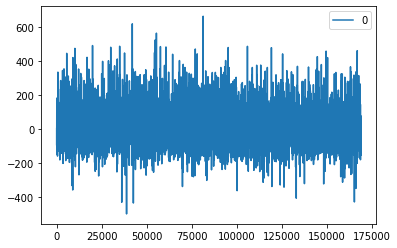

In [ ]:
#Plotting Residuals fs Distribution
residuals_fs.plot()
plt.show()

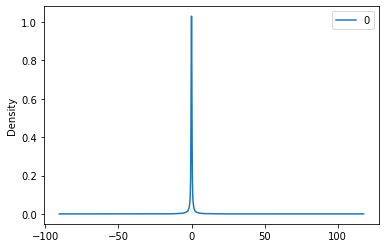

In [ ]:
#Density plot for qc
residuals_qc.plot(kind = 'kde')
plt.show()

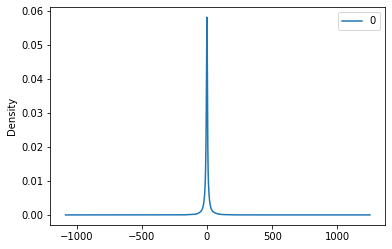

In [ ]:
#Density plot for fs
residuals_fs.plot(kind = 'kde')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


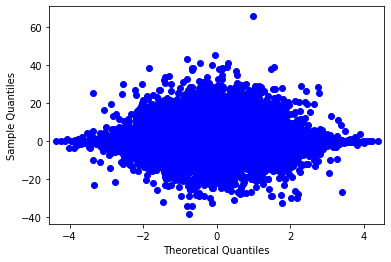

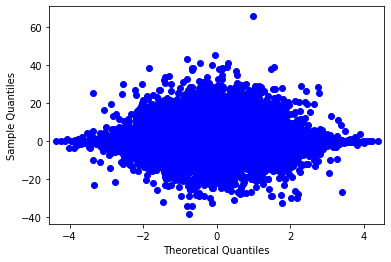

In [ ]:
#Q-Q plot for qc
from statsmodels.graphics.gofplots import qqplot
residuals_qc = np.array(residuals_qc)
qqplot(residuals_qc)

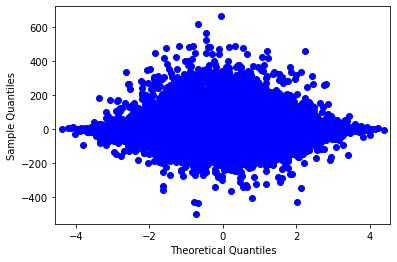

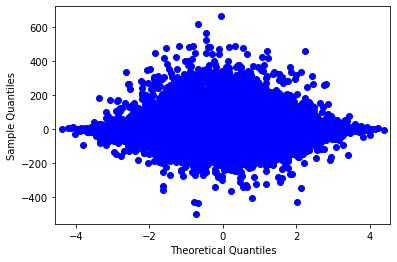

In [ ]:
#Q-Q plot for fs
from statsmodels.graphics.gofplots import qqplot
residuals_fs = np.array(residuals_fs)
qqplot(residuals_fs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


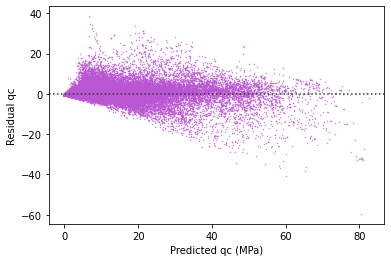

In [27]:
#ResidPlot for qc 
import seaborn as sns
sns.residplot(y_test_qc,y_pred_qc, color='mediumorchid', scatter_kws={"s": .2})
#plt.title('Model Residuals')
plt.xlabel('Predicted qc (MPa)')
plt.ylabel('Residual qc')
plt.savefig('Residual-qc.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


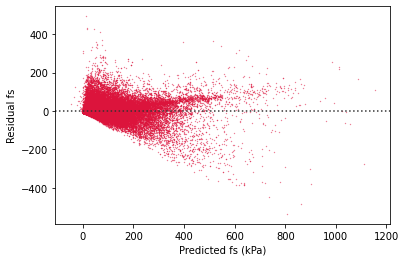

In [33]:
#ResidPlot for fs 
import seaborn as sns
sns.residplot(y_test_fs,y_pred_fs, color='crimson', scatter_kws={"s": .09})
#plt.title('Model Residuals')
plt.xlabel('Predicted fs (kPa)')
plt.ylabel('Residual fs')
plt.savefig('Residual-fs.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


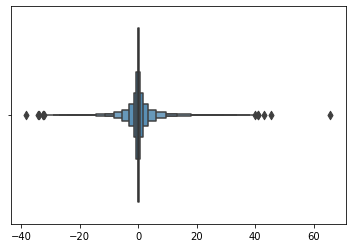

In [ ]:
#Boxplot for qc
sns.boxenplot(residuals_qc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


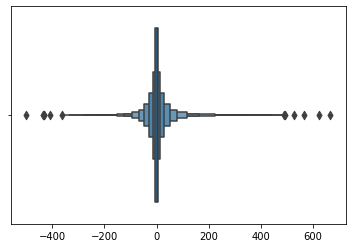

In [ ]:
#Boxplot for fs
sns.boxenplot(residuals_fs)